In [1]:
#Kümeleme
"""
Centroid-based clustering -> K-means
Hierarchical clustering -> Agglomerative, Divisive
Density Models -> DBSCAN, OPTICS
Örneğin: Sahte Haber Tespiti, Spam e-posta filtreleme, satış ve pazarlama, ağ trafiğini sınıflandırma,
şüpheli veya suçlu aktivite belirleme, deprem çalışmaları 
"""

'\nCentroid-based clustering -> K-means\nHierarchical clustering -> Agglomerative, Divisive\nDensity Models -> DBSCAN, OPTICS\nÖrneğin: Sahte Haber Tespiti, Spam e-posta filtreleme, satış ve pazarlama, ağ trafiğini sınıflandırma,\nşüpheli veya suçlu aktivite belirleme, deprem çalışmaları \n'

In [2]:
#K-means (Lloyd-Forgy Algoritması)
"""
1- K adet merkezi random olarak ata.
2- Bütün noktaların, bütün K merkezlerine olan uzaklıklarını hesapla ve en kısa mesafeye göre
küme merkezli olarak noktaları yerleştir. Bu modelin amacı küme içi mesafelerin minimize edilmesidir.
(inertia - WCSS (within cluster sum of squared distances))
3- Bütün noktalar bir kümeye atandıktan sonra, centroidleri tekrardan hesapla. 
4- Daha sonra 2 ve 3. adımları kümeler arası herhangi bir geçiş olmayana kadar sürdür. 
"""

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = dataset.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


C:\Users\ITU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


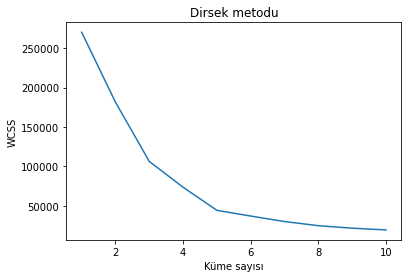

In [7]:
#Elbow (Dirsek) metodu
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Dirsek metodu')
plt.xlabel('Küme sayısı')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [11]:
test = kmeans.predict([[ 15, #Annual Income (k$)
                         39, #Spending Score (1-100)
                      ]])
print("Bu nokta", test[0], "kümesine aittir")

Bu nokta 2 kümesine aittir


In [12]:
X[y_kmeans == 0].head()

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42


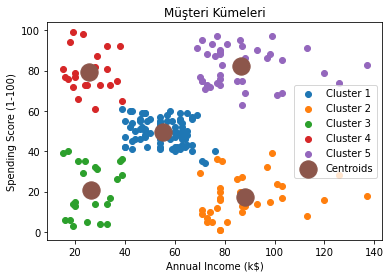

In [13]:
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: , 1], s = 300, label = 'Centroids')
plt.title('Müşteri Kümeleri')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [15]:
#Örnek-2, DIGITS
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

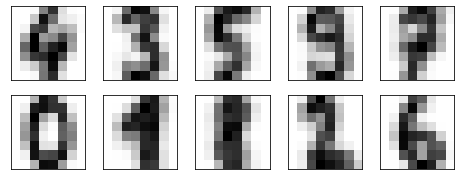

In [20]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

In [21]:
#Hierarchical Clustering (Agglomerative, Divisive)

In [22]:
#Agglomerative Kümeleme (Aşağıdan Yukarı yaklaşımı)

In [23]:
customer_data = pd.read_csv('data/Mall_Customers.csv')

In [24]:
customer_data.shape

(200, 5)

In [25]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data = customer_data.iloc[:, 3:5].values

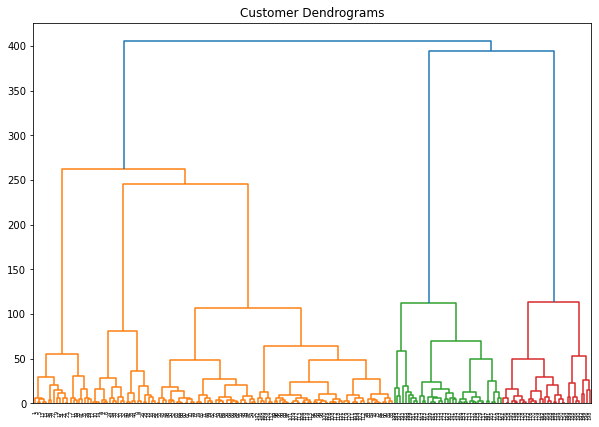

In [27]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [28]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

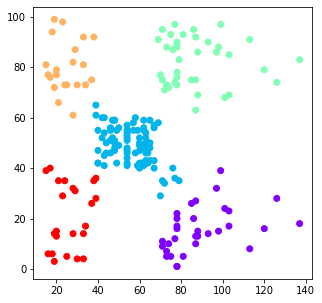

In [29]:
plt.figure(figsize = (5,5))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')